In [1]:
from skimage.transform import ProjectiveTransform
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

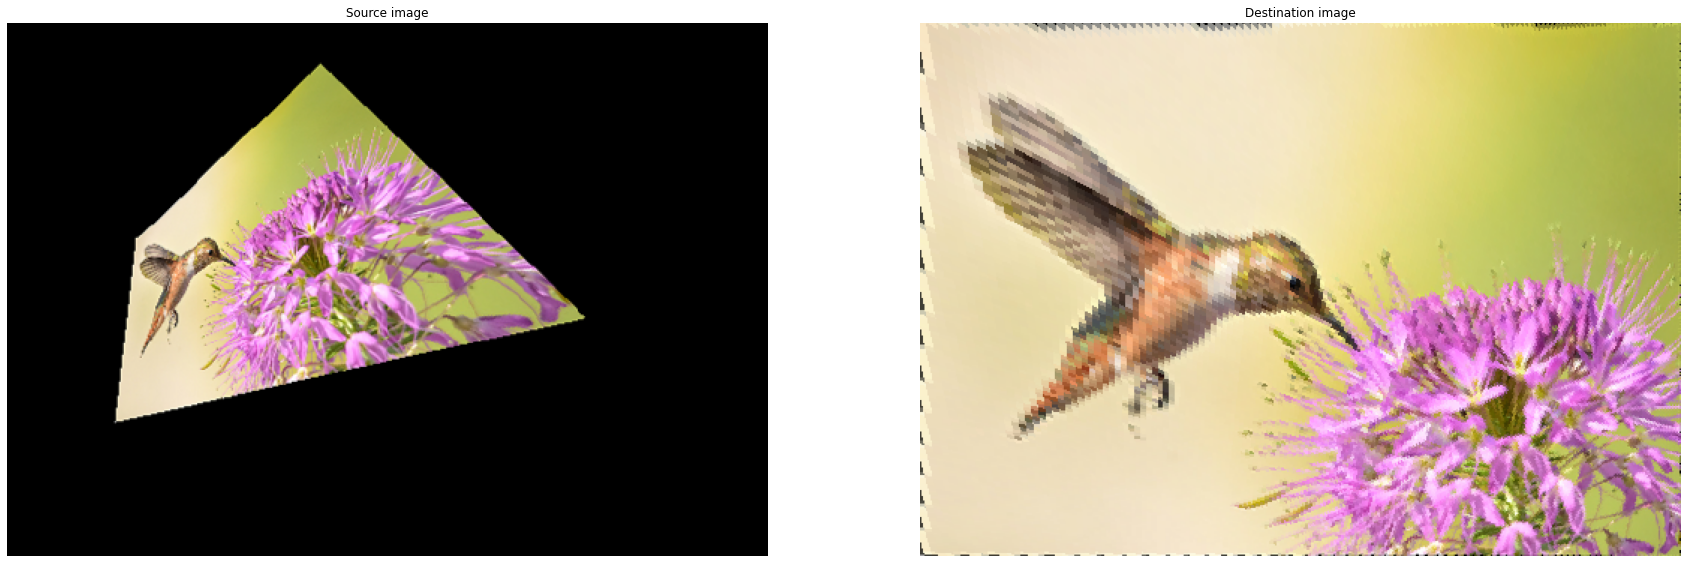

In [2]:
# Exercise 1

im_src = imread('humming.png')
height, width, dim = im_src.shape
im_dst = np.zeros((height, width, dim))

pt = ProjectiveTransform()

src = np.array([
    [145.,  86.],
    [266.,  72.],
    [196., 385.],
    [ 28., 209.]
])
dst = np.array([
    [        0.,        0.],
    [height - 1,        0.],
    [height - 1, width - 1],
    [        0., width - 1]
])

pt.estimate(src, dst)

x, y = np.mgrid[:height, :width]
dst_indices = np.hstack((x.reshape(-1, 1), y.reshape(-1,1))) 
src_indices = np.round(pt.inverse(dst_indices), 0).astype(int)
valid_idx = np.where((src_indices[:,0] < height) & (src_indices[:,1] < width) & (src_indices[:,0] >= 0) & (src_indices[:,1] >= 0))
dst_indicies_valid = dst_indices[valid_idx]
src_indicies_valid = src_indices[valid_idx]

im_dst[dst_indicies_valid[:,0],dst_indicies_valid[:,1]] = im_src[src_indicies_valid[:,0],src_indicies_valid[:,1]]

plt.figure(figsize=(30, 15))
plt.subplot(121), plt.imshow(im_src), plt.title('Source image'), plt.axis('off')
plt.subplot(122), plt.imshow(im_dst.astype(np.uint8)), plt.title('Destination image'), plt.axis('off')
plt.show()

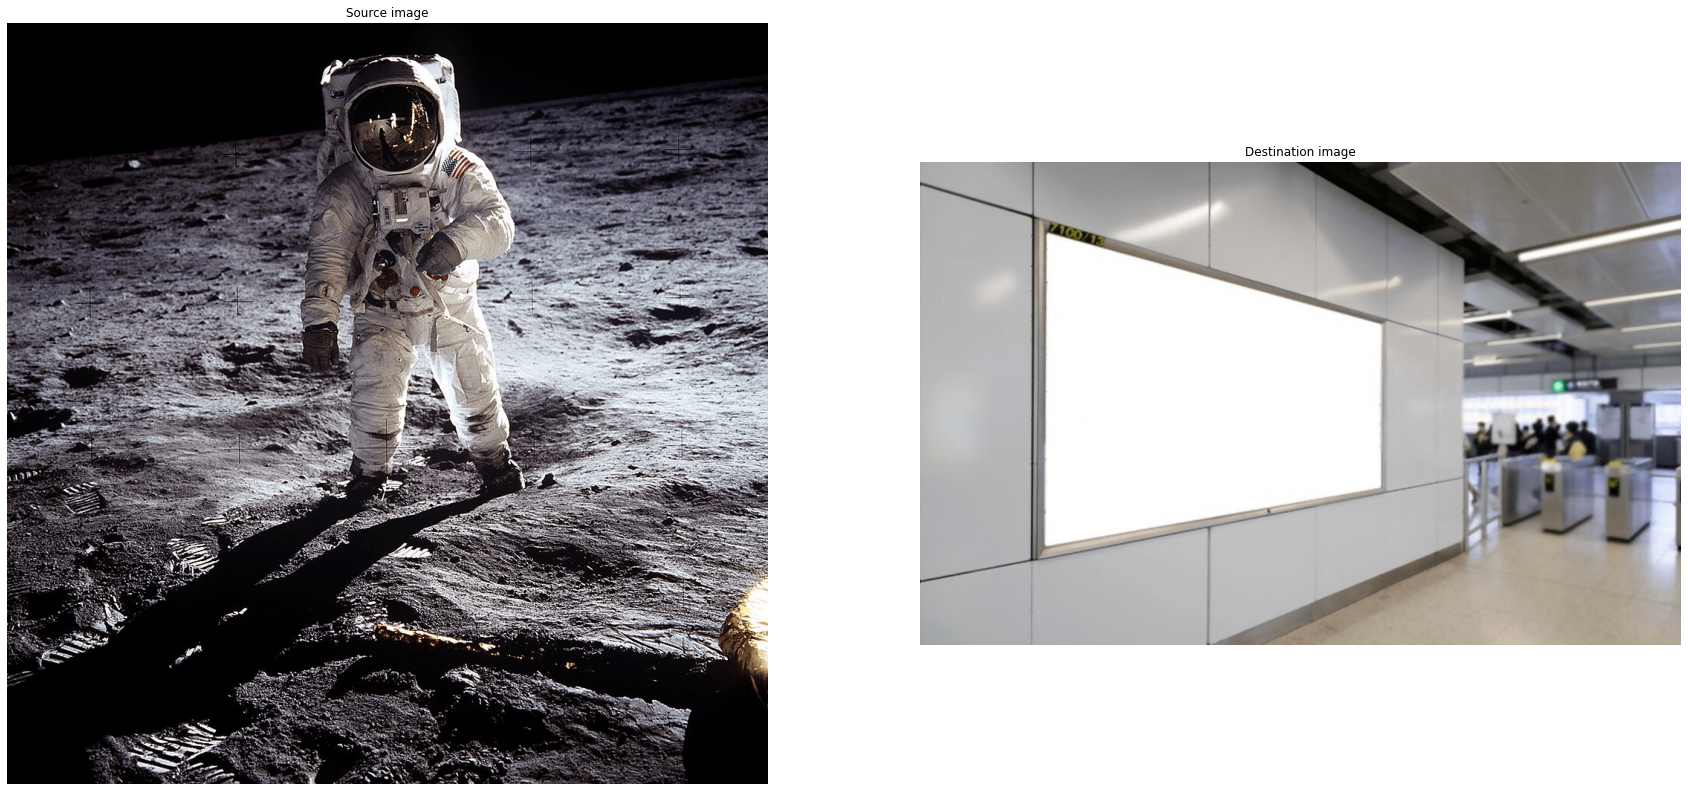

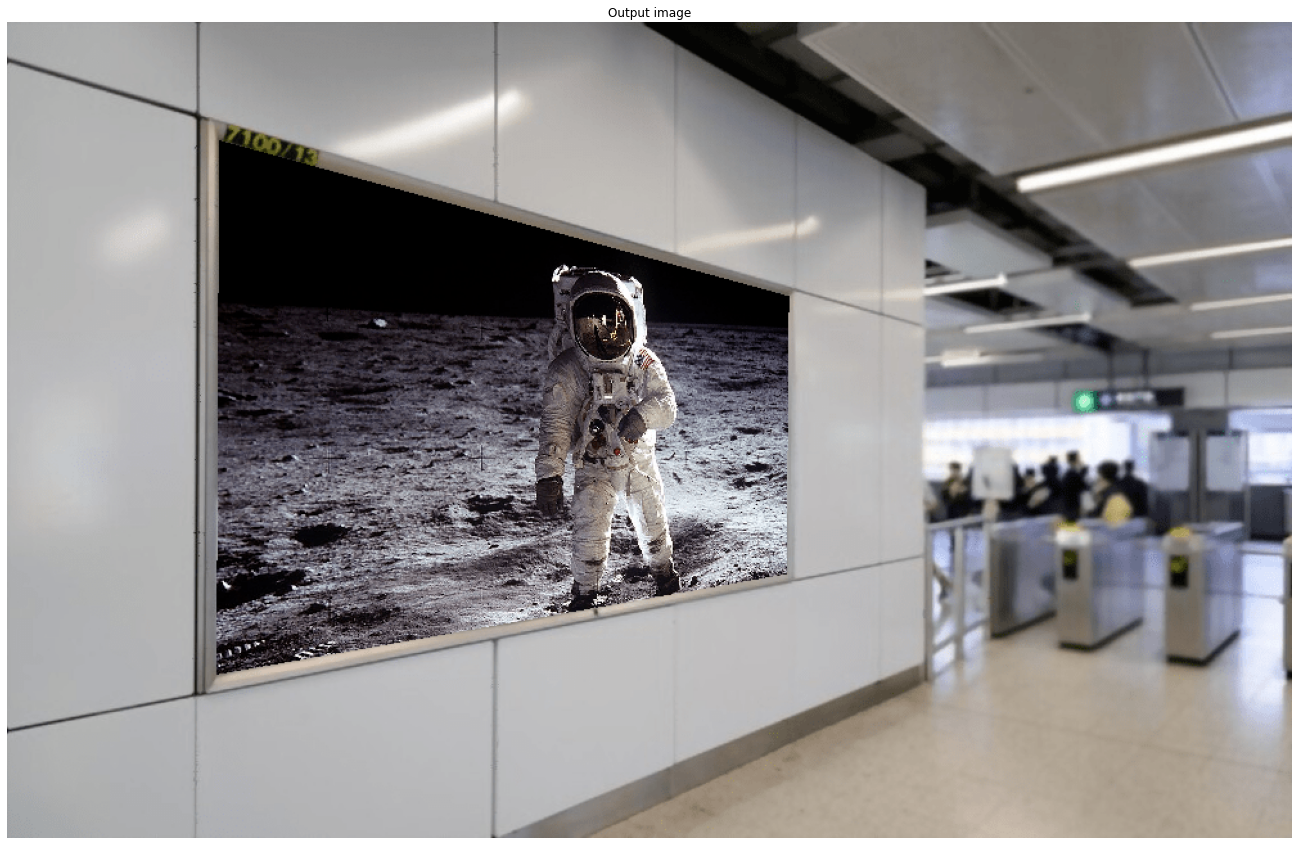

In [3]:
# Exercise 2

astronaut = imread('astronaut.png')
billboard = imread('billboard.png')
height, width, dim = billboard.shape

pt = ProjectiveTransform()

src = np.array([
    [        0.,        0.],
    [height - 1,        0.],
    [height - 1, width - 1],
    [        0., width - 1]
])
dst = np.array([
    [ 92., 165.],
    [507., 163.],
    [429., 606.],
    [213., 608.]
])

pt.estimate(src, dst)

x, y = np.mgrid[:height, :width]
dst_indices = np.hstack((x.reshape(-1, 1), y.reshape(-1,1))) 
src_indices = np.round(pt.inverse(dst_indices), 0).astype(int)
valid_idx = np.where((src_indices[:,0] < height) & (src_indices[:,1] < width) & (src_indices[:,0] >= 0) & (src_indices[:,1] >= 0))
dst_indicies_valid = dst_indices[valid_idx]
src_indicies_valid = src_indices[valid_idx]

billboard[dst_indicies_valid[:,0],dst_indicies_valid[:,1]] = astronaut[src_indicies_valid[:,0],src_indicies_valid[:,1]]

plt.figure(figsize=(30, 15))
plt.subplot(121), plt.imshow(astronaut), plt.title('Source image'), plt.axis('off')
plt.subplot(122), plt.imshow(imread('billboard.png')), plt.title('Destination image'), plt.axis('off')
plt.show()

plt.figure(figsize=(30, 15))
plt.imshow(billboard.astype(np.uint8)), plt.title('Output image'), plt.axis('off')
plt.show()